Write a function named vec_addition(u,v) which takes two vectors u and v as input and returns their vector addition.
 
  1. Inputs: u and v are two numerical numpy arrays. 
  2. Output: a vector representing sum of u and v, if they have consistent shapes, None otherwise.

In [ ]:
def vec_addition(u,v):
    if u.shape == v.shape:
        return u+v
    else:
        return None

write a function named scalar_multiply(u,k) which takes a vector u and a scalar k as input and returns k times u as output
 
  1. Inputs: A vector u and a scalar k
  2. Output: Returns a vector which is k times u

In [ ]:
def scalaer_multiply(k,u):
    return k*u

Write a function hadamard(u,v) which takes two vectors u and v as input and returns hadamard product of u and v.
Hdamard product is obtained via multiplying two matrices/vectors elementwise.
 
  1. Inputs: Two vectors u and v
  2. Output: Hadamard product of u and v if the dimensions of u and v are consistent, otherwise None

In [ ]:
def hadamard(u,v):
    if u.shape == v.shape:
        return u*v
    else:
        return None

Write a function dot_product(u,v) which take two vectors u and v as input and returns inner product of u and v as output
 
  1. Inputs: vectors u and v 
  2. Output: dot product of u and v if u and v have consistent dimension otherwise None

In [ ]:
def dot_product(u,v):
    if u.shape == v.shape:
        return u.dot(v) # np.dot(u,v)
    else:
        return None

Write a function add_constant(u,k) which adds a constant k to each element of u
 
  1. Inputs: u is a vector,k is a scalar 
  2. Output: C is a vector`

In [ ]:
def add_constant(u,k):
    return u+k

Write a function add_matrix(X,Y) to add two matrices X and Y.
 
  1. Inputs: X is a matrix, Y is a matrix 
  2. Output: Z is a matrix representing (X+Y) if X and Y have consistent dimension otherwise None

In [ ]:
def add_matrix(X,Y):
    if X.shape == Y.shape:
        return X+Y
    else:
        return None

Write a function *add_one(X)* to include first column with all elements 1 in X.
 
  1. Inputs: A matrix X
  2. Output: updated matrix with a column having elements 1 added as first column to X.

In [ ]:
def add_one(X):
    return np.column_stack((np.ones(X.shape[0]),X))

Write a function multiply(X,w) to Multiply feature matrix(X) and weight vector(w) after addition of dummy feature to feature matrix.

Inputs: Feature matrix X and weight vector w
Output: Product of X and w after adding dummy feature to feature matrix X. If the dimensions are not consistent return None.

In [ ]:
def multiply(X,w):
    X = np.column_stack((X.shape[0],X))
    
    return X@w

Write a function loss(X,w,y) which takes feature matrix(X), weight vector(w) and output label vector(y) and returns sum squared loss while implementing regression model.(Note: Do necessary preprocessing of X)
 
  1. Inputs: Feature matrix X and weight vector w and output label vector y
  2. Output: sum squared loss if dimensions of inputs are consistent, otherwise None

In [ ]:
def loss(X,w,y):
    if X.shape[1] == w.shape[0]:
        y_pred = X@w
        
        return (1/2)*(y - y_pred)**2
    else:
        return None

# Linear Regression

In [25]:
import numpy as np
import matplotlib.pyplot as plt

### Data geneartion

In [2]:
def creater_dataset(w0,w1,n):
    X= np.random.normal(size = n)

    y = w0 + w1*X + np.random.normal(size = 100)
    return X,y

In [3]:
X,y = creater_dataset(3,4,100)

Text(0, 0.5, '$\\mathbf{Y}$')

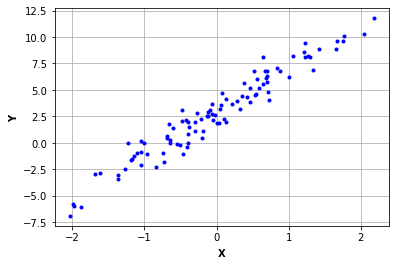

In [4]:
plt.plot(X,y,'.b')
plt.grid(True)
plt.xlabel("$\mathbf{X}$")
plt.ylabel("$\mathbf{Y}$")

In [5]:
def add_dummy_feature(X):
    return np.column_stack((np.ones(X.shape[0]),X))

X_val = add_dummy_feature(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_val,y,test_size=0.2,random_state=0)

### Regression Class

In [7]:
class LinearRegression():
    def predict(self,X):
        return X@self.w
    
    def loss(self,X,y):
        e = self.predict(X) - y
        return (1/2)*(np.transpose(e)@e)
    
    def calulate_gradient(self,X,y):
        return np.transpose(X)@(self.predict(X) - y)
    
    def update_weights(self,lr,grad):
        self.w = self.w - lr*grad
        return self.w
    
    def fit(self,X,y,lr=0.001,epochs=1000):
        self.w = np.zeros(X.shape[-1])
        loss_array = []
        
        for _ in range(epochs):
            loss = self.loss(X,y)
            loss_array.append(loss)
            
            dJdw = self.calulate_gradient(X,y)
            self.w = self.update_weights(lr,dJdw)
            
        return  loss_array
        

In [8]:
lin_reg = LinearRegression()

In [9]:
errors = lin_reg.fit(X_train,y_train)

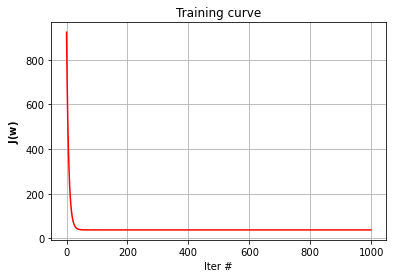

In [10]:
plt.plot(errors,'-r')
plt.title("Training curve")
plt.xlabel("Iter #")
plt.ylabel("$\mathbf{J(w)}$")
plt.grid(True)
plt.show()

In [13]:
y_pred = lin_reg.predict(X_val)

Text(0, 0.5, '$\\mathbf{Y}$')

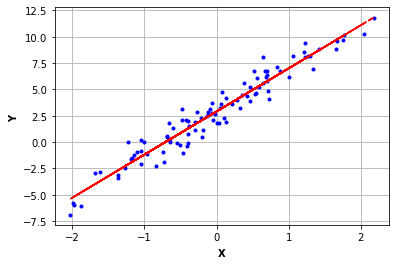

In [15]:
plt.plot(X,y,'.b')
plt.plot(X,y_pred,'r--')
plt.plot()
plt.grid(True)
plt.xlabel("$\mathbf{X}$")
plt.ylabel("$\mathbf{Y}$")

# Polynomial Regression

### Feature Transformation

In [1]:
import numpy as np
import itertools
import functools

In [51]:
def get_combinations(X,degree):
    return itertools.combinations_with_replacement(X,degree)

In [52]:
def compute_new_features(item):
    return functools.reduce(lambda x,y:x*y,item)

In [53]:
z = np.array([1,2,5])

for i in get_combinations(z,1):
    print(i,compute_new_features(i))

(1,) 1
(2,) 2
(5,) 5


In [71]:
def polynomail_transform(X,degree):
    ###########################################################################################################
    if X.ndim == 1:
        X = X.reshape(-1,1)       #Important Step
    ##########################################################################################################
    X_t = np.transpose(X)
    features = [np.ones(len(X))]
    
    for degree in range(1,degree+1):
        for items in get_combinations(X_t,degree):
            features.append(compute_new_features(items))
    
    print(X)
    
    return np.asarray(features).transpose()
    

In [72]:
z = np.array([5,4])
polynomail_transform(z,2)

[[5]
 [4]]


array([[ 1.,  5., 25.],
       [ 1.,  4., 16.]])

### Creating dataset

In [74]:
from sklearn.datasets import make_regression
X,y,coeff = make_regression(n_samples=100,n_features=10,n_informative=10,bias=1,n_targets=5,shuffle=True,coef=True,random_state=0)

# Least Square Classifier

### One Hot Encoder

In [2]:
class OneHotEncoder():
    def encode(self,y):
        e = np.eye(len(np.unique(y)))
        y_enc = e[y]
        return y_enc
    
    def decode(self,ohm):
        return np.argmax(ohm,axis = 1)

In [3]:
onehot = OneHotEncoder()

In [5]:
y = np.array([0,1,0,2,1])
y_enc = onehot.encode(y)

In [6]:
onehot.decode(y_enc)

array([0, 1, 0, 2, 1], dtype=int64)

In [36]:
class LeastSqaureClassifier():
    
    def predict(self,X:np.ndarray)->np.ndarray:
        return np.argmax(X@self.w,axis = 1)
    
    def predict_internal(self,X:np.ndarray)->np.ndarray:
        return X@self.w
    
    def loss(self,X:np.ndarray,y:np.ndarray)->float:
        e = self.predict_internal(X) - y
        return (1/2)*(np.transpose(e)@e)
    
    def calculate_gradient(self,X,y):
        return np.transpose(X)@(self.predict_internal(X) - y)
    
    def fit(self,X,y,lr=0.001,epochs=1000):
        self.w = np.zeros(X.shape[-1])
        loss_array = []
        
        for _ in range(epochs):
            loss = self.loss(X,y)
            loss_array.append(loss)
            
            dJdw = self.calculate_gradient(X,y)
            
            self.w -= lr*dJdw
            
        return loss_array
        
        

In [37]:
from sklearn.datasets import make_classification
X,y = make_classification()

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
lsc = LeastSqaureClassifier()

In [40]:
errors = lsc.fit(X_train,y_train)

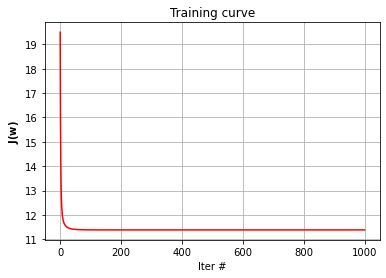

In [41]:
plt.plot(errors,'-r')
plt.title("Training curve")
plt.xlabel("Iter #")
plt.ylabel("$\mathbf{J(w)}$")
plt.grid(True)
plt.show()

In [44]:
lsc.w

array([ 0.01936146,  0.0326172 ,  0.00264069, -0.00362658, -0.00674934,
        0.03171486,  0.16493717, -0.03350599, -0.07065528, -0.01018498,
        0.05899744,  0.02316266, -0.10898587, -0.13203149, -0.1213345 ,
        0.07293616,  0.05663921,  0.00990823, -0.00487973,  0.07228633])

# Perceptron

In [85]:
class Perceptron():
    
    def predict(self,X:np.ndarray)->np.ndarray:
        z = X@self.w
        return np.where(z>=0,1,0)
    
    def loss(self,X:np.ndarray,y:np.ndarray)-> float:
        return np.sum(np.maximum(np.zeros(y.shape[0]),-1*self.predict(X)@y))
    
    def fit(self,X,y,lr=0.001,epochs=500):
        self.w = np.zeros(X.shape[-1])
        self.errors_all = []
        
        
        for _ in range(epochs):
            error = 0
            for x,y in zip(X,y):
                
                
                self.w +=  lr*(y - self.predict(x))*x
                error = np.maximum(0,-1*y*self.predict(x)) 
                self.errors_all.append(errors)
                
            return errors
        
    def confusion_matrix(self,y_test,y_pred):
        confusion_matrix = np.zeros((len(np.unique(y_test)),len(np.unique(y_test))))
        
        for true,predicted in zip(y_test,y_pred):
            confusion_matrix[true,predicted] += 1
            
        return confusion_matrix

In [86]:
perceptron = Perceptron()

In [87]:
perceptron.fit(X_train,y_train)

[19.5,
 16.081424661799616,
 14.254862080226227,
 13.254558999988177,
 12.687484751777683,
 12.35104471161539,
 12.14012464821628,
 11.999649881092706,
 11.900343158377293,
 11.826313455502577,
 11.76868346334306,
 11.722303307451606,
 11.68404466595933,
 11.651906587886323,
 11.624540077009328,
 11.600990174934251,
 11.580552134179612,
 11.562688304011676,
 11.546977986390605,
 11.533085695833243,
 11.520740062401947,
 11.509719157037747,
 11.49983987921662,
 11.490950039778708,
 11.48292231276995,
 11.47564953329254,
 11.469040994397211,
 11.463019502670697,
 11.45751901979191,
 11.452482762237894,
 11.447861662432267,
 11.443613116968802,
 11.43969996404692,
 11.43608964471306,
 11.432753512053734,
 11.429666259892839,
 11.426805448336335,
 11.424151108061043,
 11.421685408841142,
 11.419392380656927,
 11.41725767799647,
 11.415268379766596,
 11.41341281867154,
 11.411680435071855,
 11.410061651261564,
 11.408547762845455,
 11.407130844497516,
 11.405803667865095,
 11.40455962977458

In [88]:
y_pred = perceptron.predict(X_test)

In [89]:
y_test

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [90]:
perceptron.confusion_matrix(y_test,y_pred)

array([[ 8.,  0.],
       [ 2., 10.]])

# Second Perceptron

In [131]:
class Perceptron():
    
    def predict(self,X:np.ndarray):
        z = X@self.w
        return np.where(z>=0,1,0)
    
    def fit(self,X:np.ndarray,y:np.ndarray,epochs:int=500,lr:float=0.001)->np.ndarray:
        self.w = np.zeros(X.shape[-1])
        self.errors_all = []
        self.weights =[]
        for _ in range(epochs):
            error = 0
            for x,target in zip(X,y):
                error = np.sum(np.maximum(0,-1*target*self.predict(x)))
                self.w = self.w + lr*(target - self.predict(x))*x
                
                self.errors_all.append(error)
                self.weights.append(self.w)
        return self.errors_all,self.weights
    
    def confusion_matrix(self,target,predicted):
        n = len(np.unique(y_test))
        confusion_matrix = np.zeros((n,n))
        
        for test,pred in zip(target,predicted):
            confusion_matrix[test,pred] += 1
            
        return confusion_matrix        

In [132]:
per = Perceptron()

In [133]:
errors,weights = per.fit(X_train,y_train)

In [134]:
y_pred = per.predict(X_test)

In [135]:
y_test

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [137]:
cm = per.confusion_matrix(y_test,y_pred)

In [141]:
(cm[0][0] + cm[1][1])/np.sum(cm)

0.7

In [142]:
cm

array([[8., 0.],
       [6., 6.]])

# Linear Regression Again

In [7]:
import numpy as np
import matplotlib.pyplot as plt

### Generating data

In [12]:
def create_dataset(n):
    X = np.random.normal(size=n)
    
    y = 4 + 3*X + np.random.normal(n)
    
    return X,y

In [13]:
X,y = create_dataset(100)

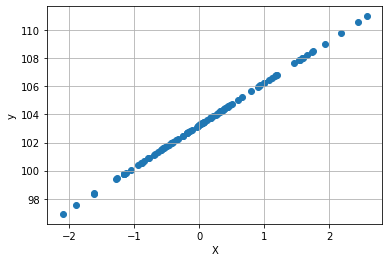

In [14]:
plt.scatter(X,y)
plt.grid(True)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [18]:
def add_dummy_feature(X):
    return np.column_stack((np.ones(X.shape[0]),X))

In [19]:
X_new = add_dummy_feature(X)

In [24]:
X_new[:5]

array([[ 1.        , -0.43208229],
       [ 1.        ,  1.16106446],
       [ 1.        ,  1.46576043],
       [ 1.        ,  0.50050677],
       [ 1.        ,  0.44798622]])

In [58]:
class LinearRegression():
    
    def predict(self,X:np.ndarray)->np.ndarray:
        return X@self.w
    
    def loss(self,X:np.ndarray,y:np.ndarray)->np.ndarray:
        return (1/2)*(np.transpose(self.predict(X) - y)@(self.predict(X) - y))
    
    def fit(self,X:np.ndarray,y:np.ndarray,lr:float=10,epochs:int=500):
        self.w = np.zeros(X.shape[-1])
        self.errors = []
        
        for _ in range(epochs):
            loss = self.loss(X,y)
            self.errors.append(loss)
            
            dJdw = np.transpose(X)@(self.predict(X) - y)
            
            self.w = self.w - lr*dJdw
            
        return self.w,self.errors

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=0)

In [60]:
w,e = lin_reg.fit(X_train,y_train)

In [61]:
lin_reg.predict(X_test)

array([108.03371318, 102.82353468, 107.63583848, 101.20596589,
       105.63294082, 103.1778706 , 101.44749986, 106.22267732,
       106.59550147, 100.88346208, 101.50902804, 106.83399607,
        99.44521271, 100.68233602, 101.48885391, 104.21285638,
       105.99252765, 109.80268584, 103.46514771, 101.84615375])

In [62]:
y_test

array([108.03371318, 102.82353468, 107.63583848, 101.20596589,
       105.63294082, 103.1778706 , 101.44749986, 106.22267732,
       106.59550147, 100.88346208, 101.50902804, 106.83399607,
        99.44521271, 100.68233602, 101.48885391, 104.21285638,
       105.99252765, 109.80268584, 103.46514771, 101.84615375])

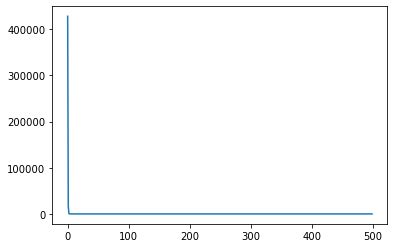

In [63]:
plt.plot(e)

# Polynomial Regression

### Generating dataset

In [2]:
def create_nonlin_dataset(n):
    X = np.random.uniform(0,10,n)
    
    y = 3 - 2*X + X**2
    
    return X,y

In [3]:
X,y = create_nonlin_dataset(100)

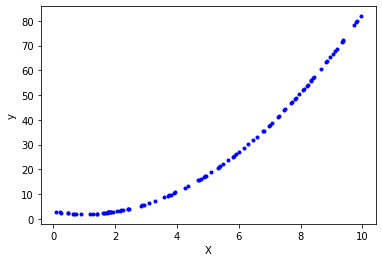

In [4]:
plt.plot(X,y,'.b')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [73]:
def add_dummy_feature(X):
    return np.column_stack((np.ones(X.shape[0]),X))

In [5]:
import itertools
import functools
def polynomial_transform(X,degree):
    def get_combinations(X,degree):
        return itertools.combinations_with_replacement(X,degree)
    
    def get_features(items):
        return functools.reduce(lambda x,y:x*y,items)
    
    
    X = np.array(X)
    X = X.reshape(-1,1)
    X_t = np.transpose(X)
    features = [np.ones(len(X))]
    
    for degree in range(1,degree+1):
        for items in get_combinations(X_t,degree):
            features.append(get_features(items))
            
    return np.array(features).transpose()

In [7]:
z = np.array([4,5])
polynomial_transform(z,3)

array([[  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

In [81]:
class LinearRegression():
    
    def predict(self,X:np.ndarray)->np.ndarray:
        return X@self.w
    
    def loss(self,X:np.ndarray,y:np.ndarray)->np.ndarray:
        return (1/2)*(np.transpose(self.predict(X) - y)@(self.predict(X) - y))
    
    def fit(self,X:np.ndarray,y:np.ndarray,lr:float=10,epochs:int=500):
        self.w = np.zeros(X.shape[-1])
        self.errors = []
        
        for _ in range(epochs):
            loss = self.loss(X,y)
            self.errors.append(loss)
            
            dJdw = np.transpose(X)@(self.predict(X) - y)
            
            self.w = self.w - lr*dJdw
            
        return self.w,self.errors

In [83]:
poly_reg = LinearRegression()

In [84]:
X_poly = polynomial_transform(X,2)

In [85]:
X_poly[:5,:]

array([[ 1.        ,  7.26662058, 52.80377465],
       [ 1.        ,  8.65972728, 74.99087656],
       [ 1.        ,  1.41104285,  1.99104191],
       [ 1.        ,  1.40657466,  1.97845228],
       [ 1.        ,  7.80970626, 60.99151188]])

In [86]:
weights,errors = poly_reg.fit(X_poly,y)

C:\Users\user\AppData\Local\Temp/ipykernel_12732/1491670194.py:7: RuntimeWarning: overflow encountered in matmul
  return (1/2)*(np.transpose(self.predict(X) - y)@(self.predict(X) - y))
C:\Users\user\AppData\Local\Temp/ipykernel_12732/1491670194.py:17: RuntimeWarning: overflow encountered in matmul
  dJdw = np.transpose(X)@(self.predict(X) - y)
C:\Users\user\AppData\Local\Temp/ipykernel_12732/1491670194.py:19: RuntimeWarning: overflow encountered in multiply
  self.w = self.w - lr*dJdw
C:\Users\user\AppData\Local\Temp/ipykernel_12732/1491670194.py:19: RuntimeWarning: invalid value encountered in subtract
  self.w = self.w - lr*dJdw


In [88]:
?np.random.multivariate_normal

# Least Square Classificaion

In [8]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [10]:
class LeastSquareClassifier():
    
    def predict(self,X):
        z = X@self.w
        return np.where(z>=0,1,0)
    
    def predict_internal(self,X):
        return X@self.w
    
    def loss(self,X,y):
        return (1/2)*(np.transpose(self.predict_internal(X) - y)@(self.predict_internal(X) -y))
    
    def fit(self,X,y):
        self.w = np.linalg.pinv(X)@y
        return self.w
    
    def calcualte_gradient(self,X,y):
        return np.transpose(X)@(self.predict_internal(X) - y)
    
    def update_weights(self,lr,grad):
        self.w -= lr*grad
        return self.w
    
    def gradient_desecent(self,X,y,lr=0.001,epochs=500):
        self.w = np.zeros(X.shape[-1])
        self.loss_array = []
        
        for _ in range(epochs):
            loss = self.loss(X,y)
            self.loss_array.append(loss)
            
            dJdw = self.calcualte_gradient(X,y)
            
            self.w = self.update_weights(lr,dJdw)
            
        return self.w,self.loss_array
    
    def confusion_matrix(self,y_test,y_pred):
        n = len(np.unique(y_test))
        confusion_matrix = np.zeros((n,n))
        
        for t,p in zip(y_test,y_pred):
            confusion_matrix[t,p] +=1
            
        return confusion_matrix

In [11]:
lsc = LeastSquareClassifier()

In [12]:
lsc.fit(X_train,y_train)

array([ 0.06480608,  0.11604687,  0.13119956,  0.03990051, -0.03728211,
       -0.12104786,  0.02296717,  0.10232088,  0.05490125, -0.06415942,
       -0.04603428,  0.1001604 , -0.08508838,  0.12703539, -0.0824152 ,
       -0.05702845,  0.01313815,  0.26630782, -0.16891295,  0.06626366])

In [13]:
y_pred = lsc.predict(X_test)

In [14]:
lsc.confusion_matrix(y_test,y_pred)

array([[11.,  1.],
       [ 1.,  7.]])

In [15]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [16]:
y_test

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [17]:
weights,errors = lsc.gradient_desecent(X_train,y_train)

In [18]:
weights

array([ 0.06480623,  0.11604702,  0.13119957,  0.03990045, -0.03728218,
       -0.12104785,  0.02296717,  0.10232087,  0.05490126, -0.06415934,
       -0.04603415,  0.10016039, -0.08508834,  0.12703518, -0.08241514,
       -0.05702838,  0.01313801,  0.26630779, -0.16891306,  0.06626362])

In [19]:
errors

[20.5,
 17.711899300302996,
 15.917770941316213,
 14.726992879465044,
 13.908741890496934,
 13.325323279808636,
 12.89362803209756,
 12.56276877400374,
 12.3010444211363,
 12.088299882796072,
 11.911417400436925,
 11.76163389651364,
 11.632928906035797,
 11.521044373725715,
 11.422880373574928,
 11.336116615134257,
 11.25897108494381,
 11.190043063608154,
 11.128208827380178,
 11.072550791832127,
 11.022308268399142,
 10.976842459639162,
 10.93561102476772,
 10.898149210141503,
 10.864055575434346,
 10.832981001254563,
 10.804620084641977,
 10.778704303602524,
 10.754996514325462,
 10.733286468050066,
 10.713387119314525,
 10.695131556552251,
 10.678370428049544,
 10.662969766578849,
 10.64880913816583,
 10.635780056847056,
 10.623784619570394,
 10.612734324716799,
 10.602549044874824,
 10.593156130041312,
 10.584489621758419,
 10.57648956212179,
 10.569101384323169,
 10.562275373582409,
 10.555966189098516,
 10.5501324390967,
 10.544736302237398,
 10.539743189636146,
 10.5351214425609

In [20]:
y_grad_pred = lsc.predict(X_test)

In [21]:
lsc.confusion_matrix(y_test,y_grad_pred)

array([[11.,  1.],
       [ 1.,  7.]])

In [70]:
x1 = np.random.normal(2,2,size = 100).reshape(50,2)
x2 = np.random.normal(10,2,size = 100).reshape(50,2)

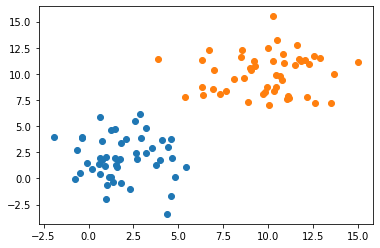

In [71]:
plt.scatter(x1[:,0],x1[:,1])
plt.scatter(x2[:,0],x2[:,1])


In [72]:
y1 = np.zeros(x1.shape[0])
y2 = np.ones(x2.shape[0])

In [73]:
X = np.row_stack((x1,x2))
X.shape

(100, 2)

In [74]:
y = np.concatenate([y1,y2],axis = 0).astype(int)

In [75]:
X = np.column_stack((np.ones(X.shape[0]),X))

In [28]:
def one_hot_encode(y):
    e = np.eye(len(np.unique(y)))
    y_enc = e[y]
    
    return y_enc

In [29]:
y_enc = one_hot_encode(y)

In [35]:
y_enc[:5,:]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_enc,test_size=0.2,random_state=0)

# Perceptron

In [121]:
class Perceptron():
    
    def predict(self,X):
        z = X@self.w
        return np.where(z>=0,1,0)
    
    def fit(self,X,y,lr =0.001,epochs=1000):
        self.w = np.zeros(X.shape[-1])
        self.errors_all = []
        self.w_all = []
        for _ in range(epochs):
            errors = 0
            for xi,target in zip(X,y):
                
                self.w += lr*(target - self.predict(xi))*xi
                errors += max(0,-1*target*self.predict(xi))
                
            self.errors_all.append(errors)
            self.w_all.append(self.w)
            print("w : ",percep.w)
            print("J(w) :",percep.errors_all[-1])


In [122]:
percep = Perceptron()

In [123]:
X = np.array([[1,3,5,4],[2,4,-0.7,-1.3]])
percep.w = np.array([1,1,1,1])

In [124]:
y = np.array([0,0])

In [125]:
percep.fit(X,y)

w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.00

w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.00

w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.00

J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.

w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.004]
J(w) : 0
w :  [-0.001 -0.003 -0.005 -0.00

In [126]:
percep.predict(X)

array([0, 0])

In [127]:
y

array([0, 0])

In [103]:
for x,y in zip(X,y):
    print(x,y)

[1. 3. 5. 4.] 0
[ 2.   4.  -0.7 -1.3] 0
